In [26]:
import pandas as pd
import glob
import matplotlib.pyplot as plt


path = r'/home/hakanergin/code/apriltag_test_bench/test_pipeline/scripts/static_tests/translations/result/csv'
all_files = glob.glob(path + "/*.csv")

df_groupby_res = {"360": {}, "720": {}, "1080": {}}

for filename in all_files:
    tag, res  = filename.split('_')[-2:]
    res = res.split('.')[0]
    tag = tag.split('/')[-1]

    df = pd.read_csv(filename)
    df = df[['error', 'true_distance']]

    df_groupby_res[res].update({tag: df})


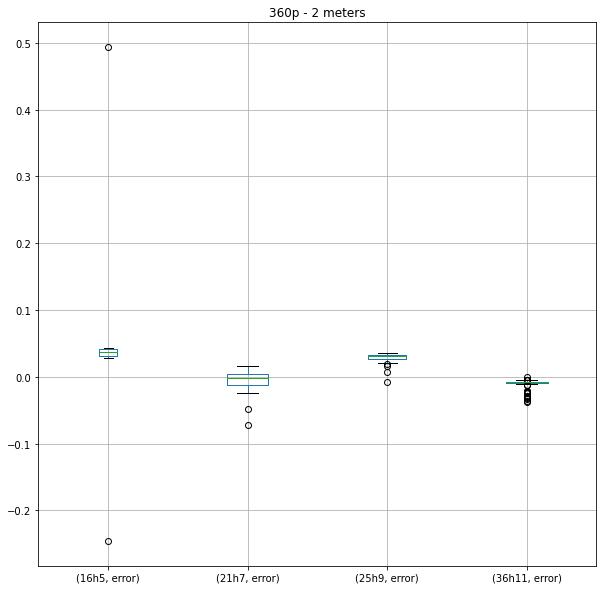

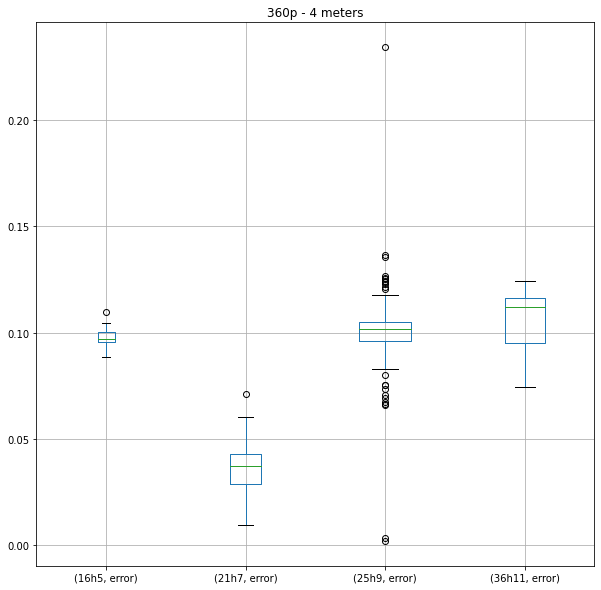

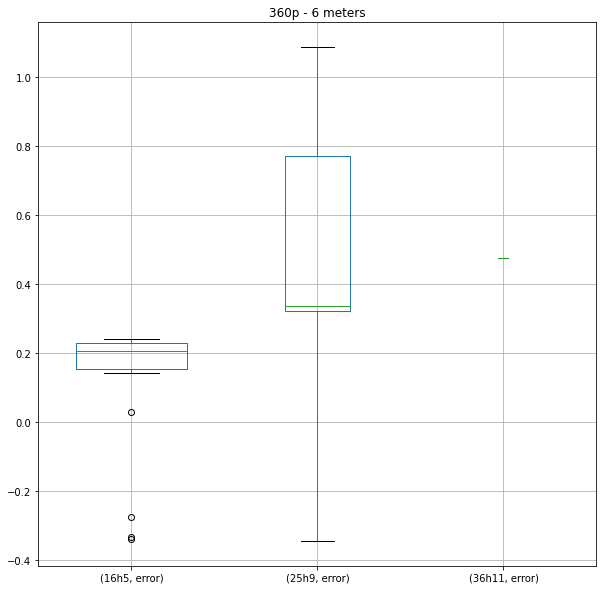

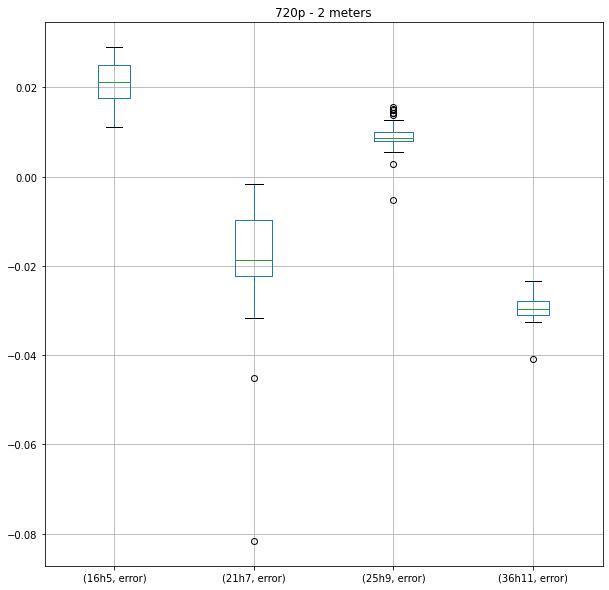

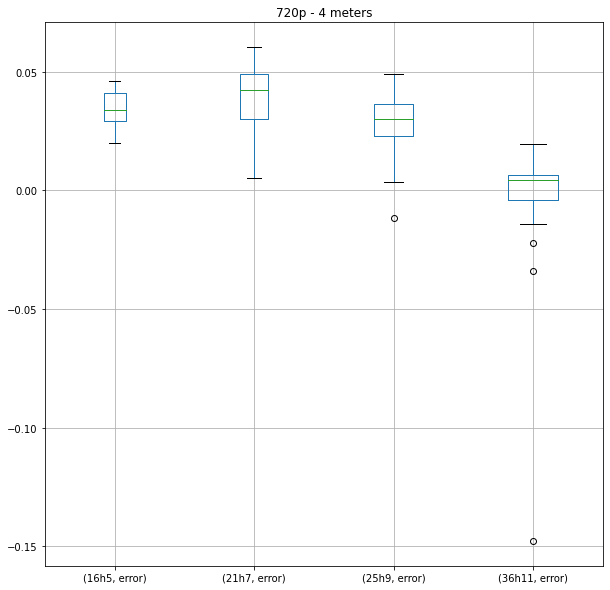

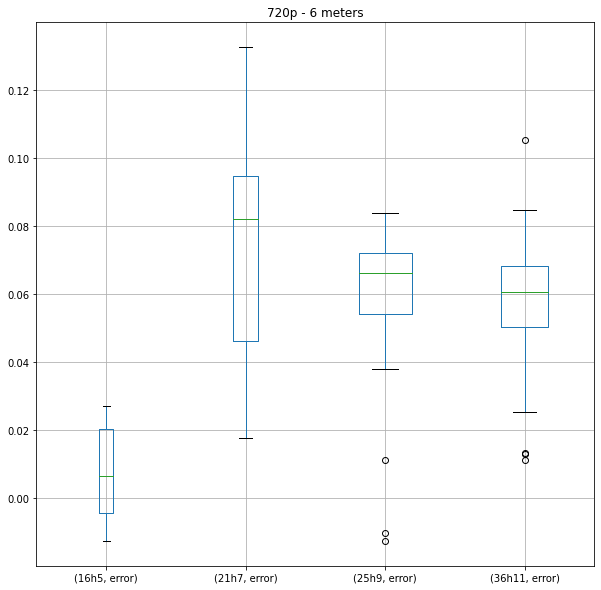

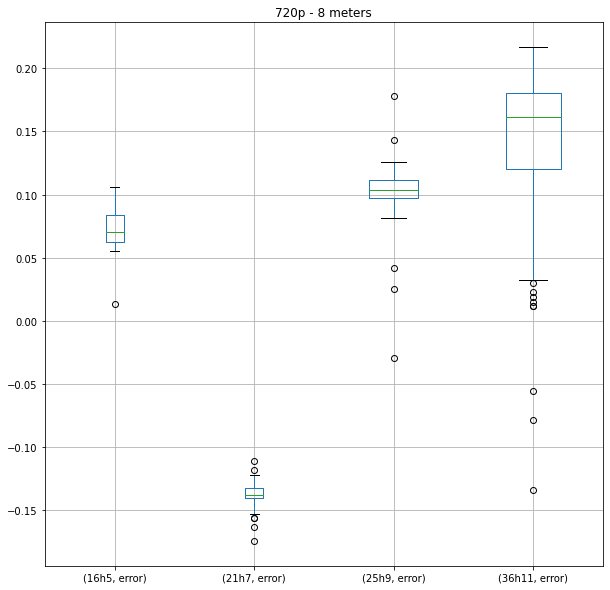

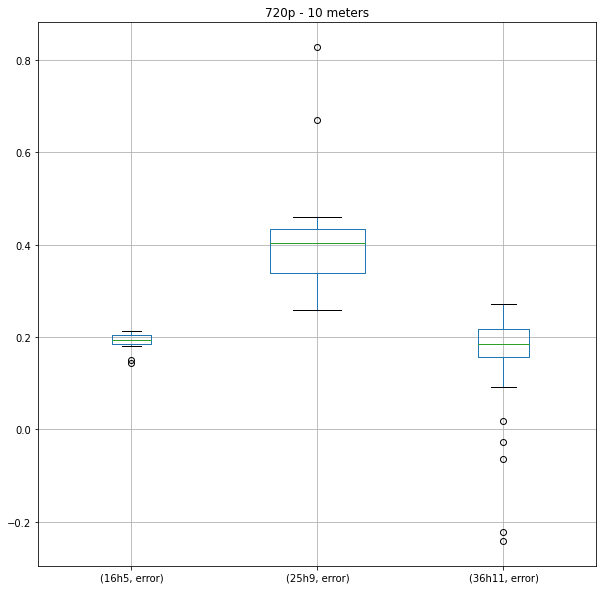

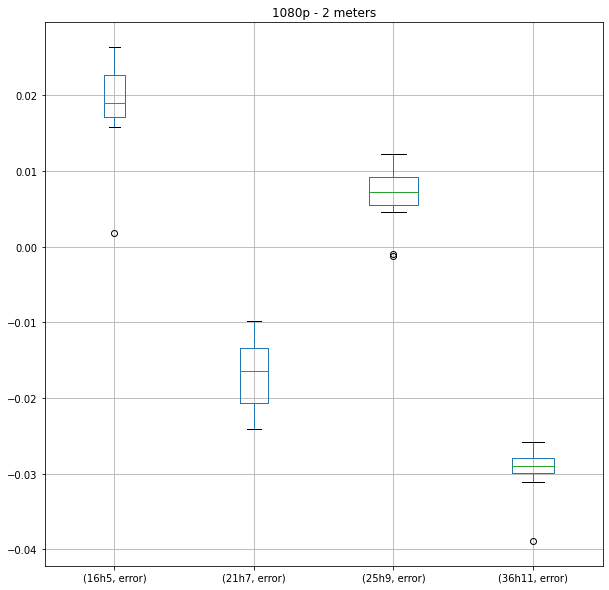

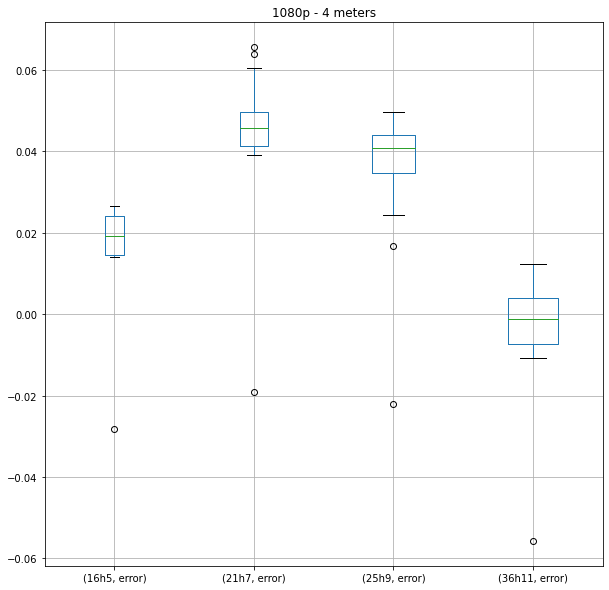

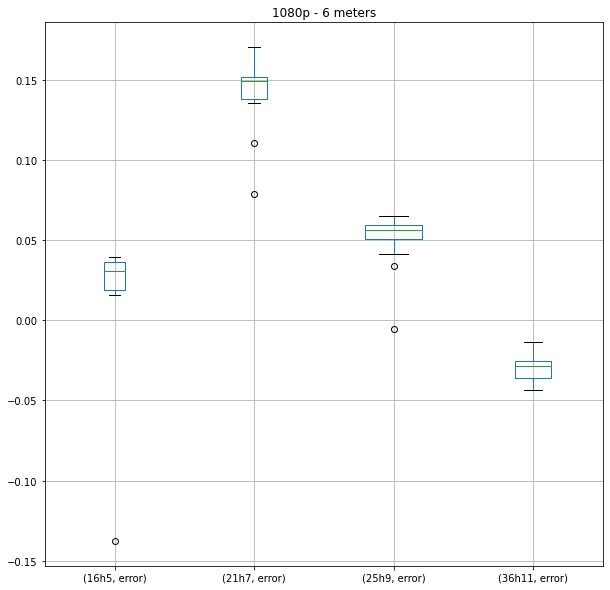

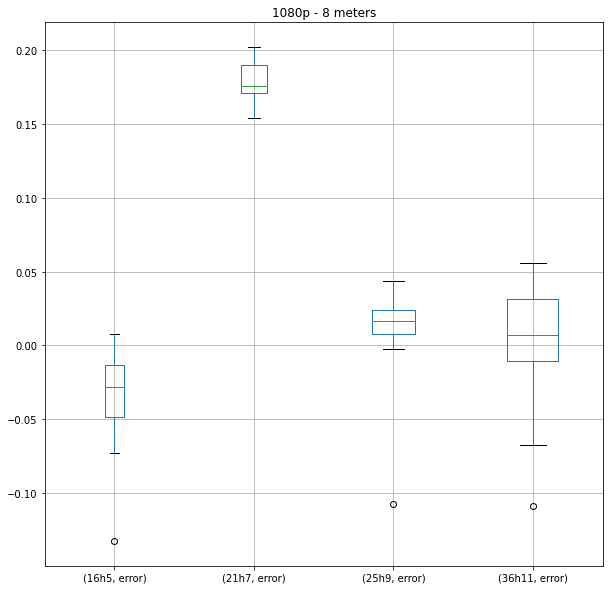

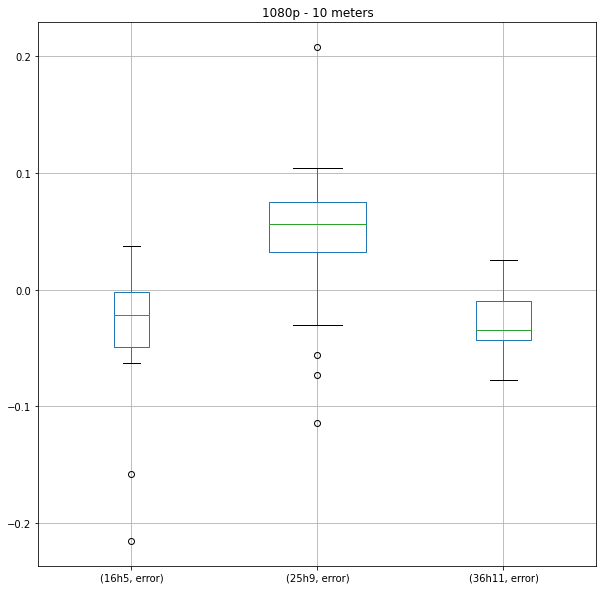

In [27]:
for key in df_groupby_res.keys(): # res level
    df = pd.concat(df_groupby_res[key]).reset_index().rename({'level_0': 'tag'}, axis=1).drop(columns=['level_1'], axis=1)
    for distance in df['true_distance'].unique():
        fig, ax = plt.subplots()
        grouped_df = df.loc[df['true_distance']==distance].groupby('tag')

        width_vals = grouped_df['true_distance'].count().values

        grouped_df.boxplot(column=['error'], figsize=(8,12), subplots=False, widths=[float(i)/sum(width_vals) for i in width_vals] if (len(width_vals)>1) else None)
        dist_text = '{}p - {} meters'.format(key, distance)
        ax.set_title(dist_text)
        fig.set_size_inches(10,10)
        plt.show()

